In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

# Set random seed
np.random.seed(0)

In [4]:
%store -r data

In [3]:
#data

In [5]:
data.Activity.unique() #array([1, 2, 3, 4, 5, 6])

array([1, 2, 3, 4, 5, 6])

In [6]:
# New Column 'isTrain' == True for a row if random number generated (between 0 and 1) is less than or equal to .7
# and false otherwise

data['is_train'] = np.random.uniform(0, 1, len(data)) <= .7
data.head()

,A_xacc,A_yacc,A_zacc,A_xgyro,A_ygyro,A_zgyro,A_xmag,A_ymag,A_zmag,Subject,Activity,rowData,Frequence,is_left,is_train
0,-0.39088,-6.9683,6.9030,-0.014133,0.003125,-0.011263,-0.067876,0.79872,-0.21041,1,1,1,1,1,True
1,-0.35910,-7.0292,6.9094,-0.000001,0.004322,-0.004176,-0.067793,0.79870,-0.20877,1,1,2,2,1,False
2,-0.35433,-6.9685,6.8987,0.007218,-0.006623,-0.007716,-0.067630,0.79884,-0.21053,1,1,3,3,1,True
3,-0.36155,-7.0195,6.8994,-0.008128,-0.004702,0.001095,-0.066574,0.79853,-0.20959,1,1,4,4,1,True
4,-0.36405,-6.9903,6.9136,-0.001434,-0.012473,-0.020107,-0.066845,0.79829,-0.20997,1,1,5,5,1,True


## Create Train and Test Data

In [7]:
# 2 dataFrames: for Training and Testing
train, test = data[data['is_train']==True], data[data['is_train']==False]
print('Number of rows the training set:', len(train))
print('Number of rows in the test set:',len(test))

Number of rows the training set: 503793
Number of rows in the test set: 216207


In [8]:
# list of the feature column's names
features_df = data.drop(["Activity","Subject","rowData","Frequence","is_train"],axis=1)
features = features_df.columns[:]
features

Index(['A_xacc', 'A_yacc', 'A_zacc', 'A_xgyro', 'A_ygyro', 'A_zgyro', 'A_xmag',
       'A_ymag', 'A_zmag', 'is_left'],
      dtype='object')

In [9]:
#target
y = pd.factorize(train['Activity'])[0]+1
y

array([1, 1, 1, ..., 6, 6, 6])

### Random Forest Classifier

In [10]:
# Create random forest Classifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)

# Train the Classifier to take the training features and learn how they relate
# to the training y (activities)
clf.fit(train[features], y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

## Accuracy Metrics for Test Data

In [11]:
# Apply the Classifier we trained to the test data
clf.predict(test[features])

array([1, 1, 1, ..., 6, 6, 6])

In [12]:
# predicted probabilities of the first 10 rows
clf.predict_proba(test[features])[0:10]

array([[ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.]])

In [13]:
predictionsRF = clf.predict(test[features])
predictionsRF

array([1, 1, 1, ..., 6, 6, 6])

In [14]:
test['Activity'].head()

1     1
7     1
8     1
10    1
13    1
Name: Activity, dtype: int64

### Confusion matrix

In [15]:
pd.crosstab(test['Activity'], predictionsRF, rownames=['Actual Activity'], colnames=['Predicted Activity'])

Predicted Activity,1,2,3,4,5,6
Actual Activity,,,,,,
1,35714,3,21,7,1,4
2,0,36021,49,184,1,18
3,2,132,35923,151,5,34
4,2,274,185,35612,2,6
5,0,7,23,44,35522,57
6,0,97,35,27,23,36021


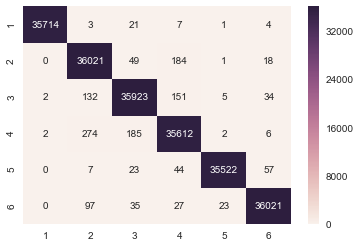

In [16]:
sns.heatmap(data=confusion_matrix(test['Activity'],predictionsRF),
            fmt='.0f',
            annot=True,
            xticklabels=np.unique(test['Activity']),
            yticklabels=np.unique(test['Activity']))

In [17]:
# List of the features and their importance scores
list(zip(train[features], clf.feature_importances_))

[('A_xacc', 0.14075057057139484),
 ('A_yacc', 0.070650803572211401),
 ('A_zacc', 0.093262501422043842),
 ('A_xgyro', 0.042501229303196456),
 ('A_ygyro', 0.092960410880156941),
 ('A_zgyro', 0.073995472386010036),
 ('A_xmag', 0.20354719382062597),
 ('A_ymag', 0.13029565007532232),
 ('A_zmag', 0.13637767256247357),
 ('is_left', 0.015658495406564603)]

In [18]:
print(classification_report(test['Activity'],predictionsRF))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00     35750
          2       0.99      0.99      0.99     36273
          3       0.99      0.99      0.99     36247
          4       0.99      0.99      0.99     36081
          5       1.00      1.00      1.00     35653
          6       1.00      0.99      1.00     36203

avg / total       0.99      0.99      0.99    216207



In [19]:
accuracy_score(test['Activity'],predictionsRF)

0.99355247517425427

In [20]:
%store train
%store test
%store y
%store features

Stored 'train' (DataFrame)
Stored 'test' (DataFrame)
Stored 'y' (ndarray)
Stored 'features' (Index)


In [23]:
# scatterplot : distribution of final variables for each activity
# sns.plt.figure(figsize=(6,6))
# sns.set_style('whitegrid')

# sns.pairplot(data=train[[col for col in features]+['Activity']],
#              hue='Activity',
#              palette='Set2',
#              diag_kind='kde')


Index(['A_xacc', 'A_yacc', 'A_zacc', 'A_xgyro', 'A_ygyro', 'A_zgyro', 'A_xmag',
       'A_ymag', 'A_zmag', 'is_left'],
      dtype='object')